In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
from google.colab import files
uploaded = files.upload()


Saving telco_churn_cleaned.csv to telco_churn_cleaned.csv


In [3]:
df = pd.read_csv('telco_churn_cleaned.csv')
df.head()

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,gender_Male,...,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,avg_monthly_spend,long_term_customer
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,True,False,14.925000,0
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,True,False,False,False,True,53.985714,1
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,True,36.050000,0
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,False,False,False,True,False,False,False,False,40.016304,1
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,True,False,50.550000,0


# Target Variable: Churn Distribution

In [4]:
df['churn'].value_counts(normalize=True)


,proportion
churn,
0,0.73463
1,0.26537


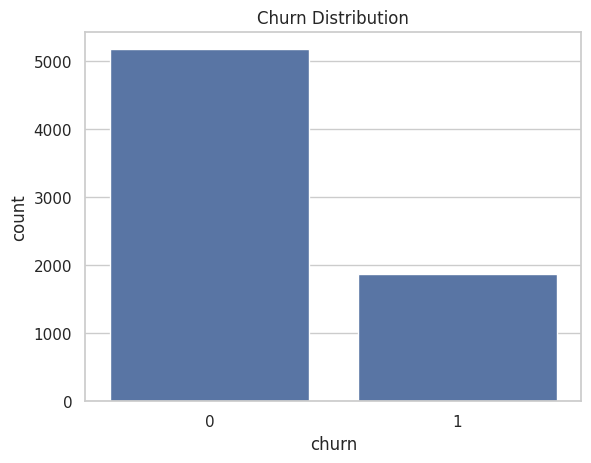

In [5]:
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()


Churn is imbalanced (≈ 26–27% churn)

Accuracy alone is misleading → use ROC-AUC, Recall, precicion,confussion matrix



# Churn vs Tenure

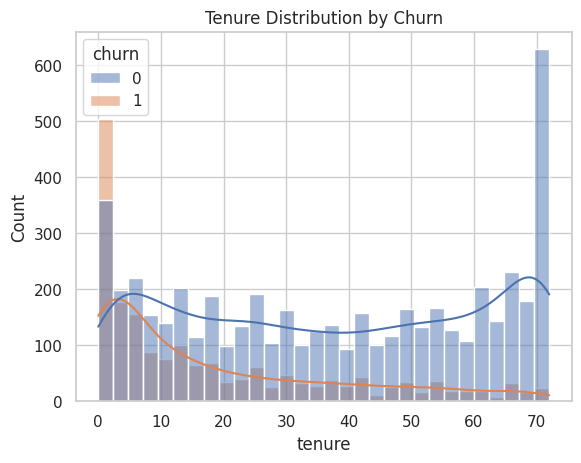

In [6]:
sns.histplot(data=df, x='tenure', hue='churn', bins=30, kde=True)
plt.title('Tenure Distribution by Churn')
plt.show()

New customers churn early fo 19-12 months
early engagement is vital

# Monthly Charges vs Churn

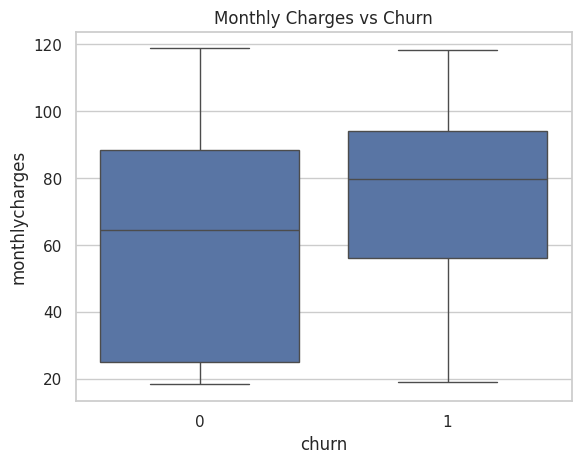

In [7]:
sns.boxplot(x='churn', y='monthlycharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

Customers who churn pay higher monthly charges. Price sensitivity is key

# Average monthy spend vs Churn

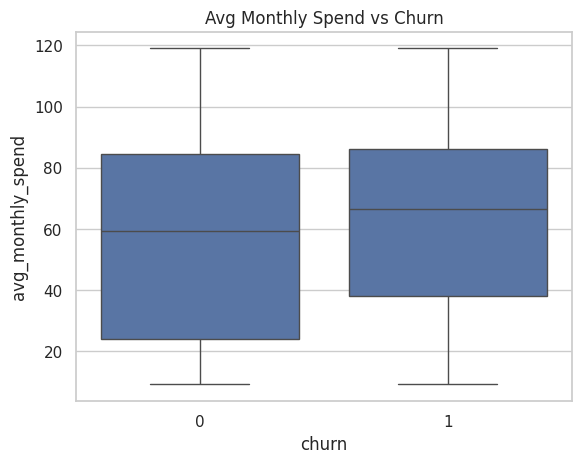

In [12]:
sns.boxplot(x='churn', y='avg_monthly_spend', data=df)
plt.title('Avg Monthly Spend vs Churn')
plt.show()

Higher paying customer higher churn

# Binary feature analysis vs churn

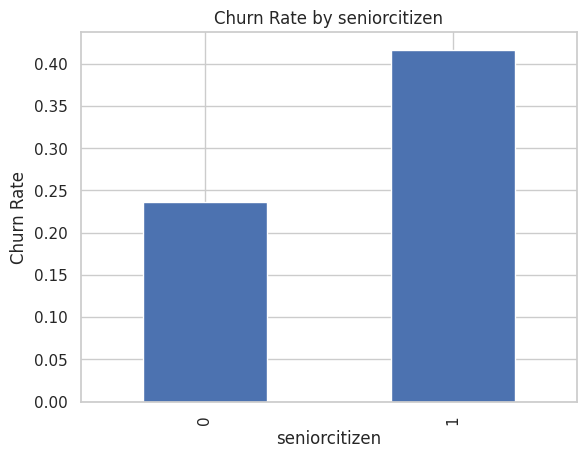

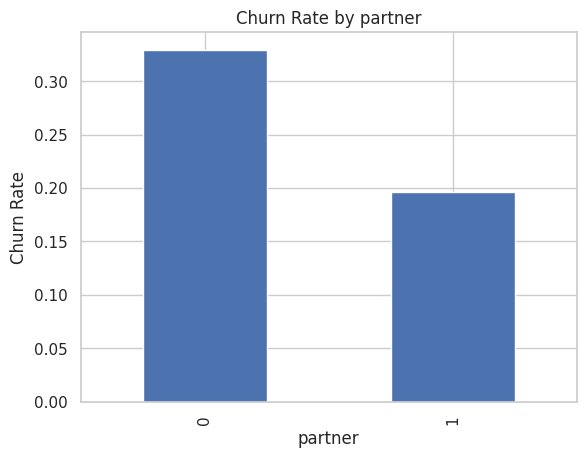

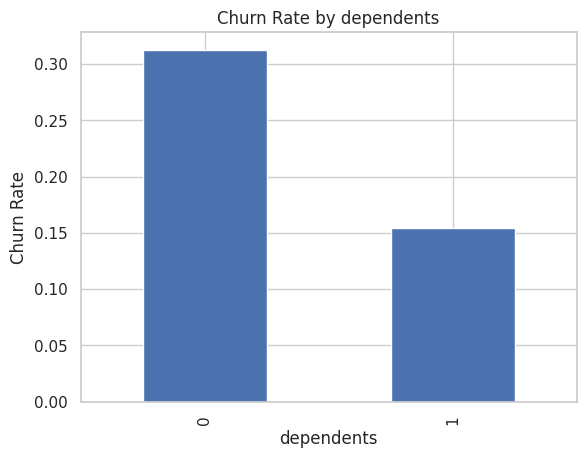

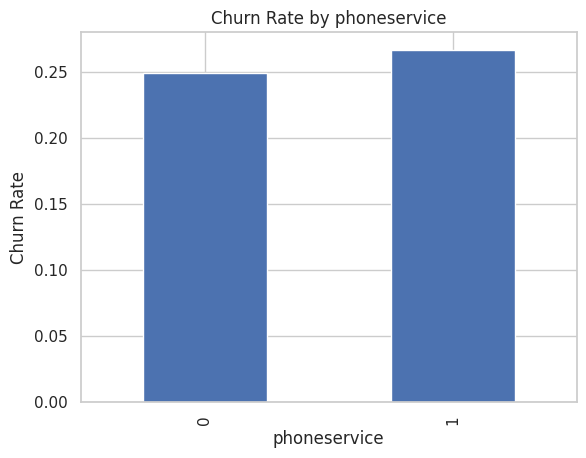

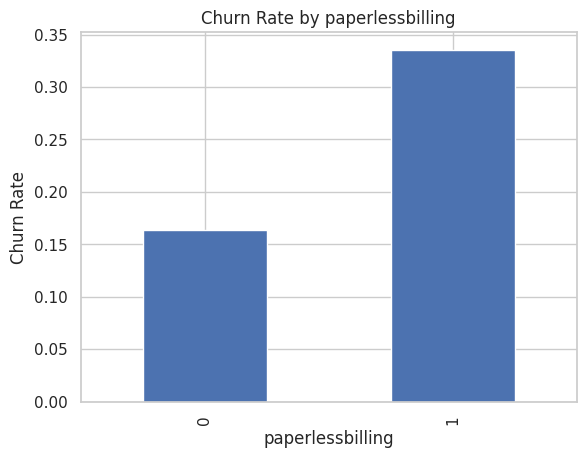

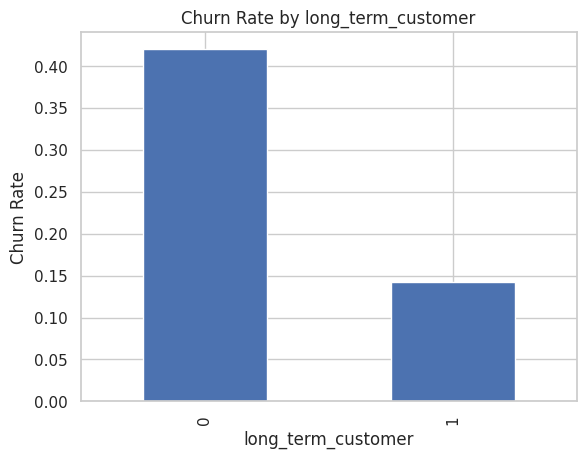

In [13]:
binary_cols = [
    'seniorcitizen', 'partner', 'dependents',
    'phoneservice', 'paperlessbilling',
    'long_term_customer'
]

for col in binary_cols:
    churn_rate = df.groupby(col)['churn'].mean()
    churn_rate.plot(kind='bar')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.show()


1. Senior citizien hive higher churn rate
2. Customers without partners have higher churn rate
3. Customers without dependants have higher churn rate
4. Phone service is slightly higher but not significant enough
5. Customers with paperless billing  have higher churn rate
6. Short term customers have higher churn rate

---



# Contract vs Churn

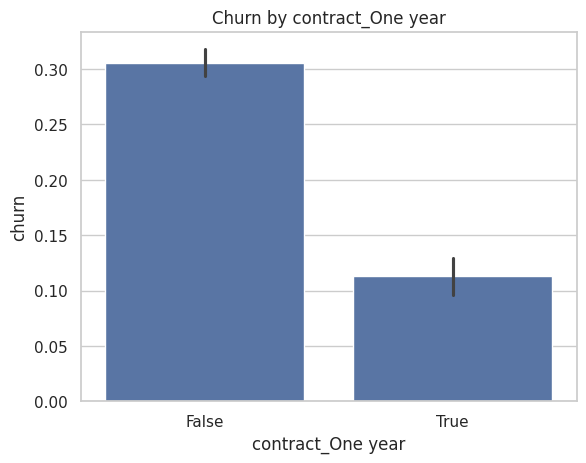

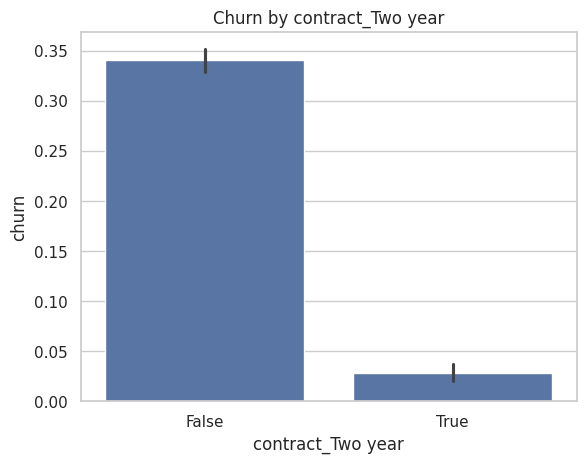

In [14]:
contract_cols = ['contract_One year', 'contract_Two year']

for col in contract_cols:
    sns.barplot(x=df[col], y=df['churn'])
    plt.title(f'Churn by {col}')
    plt.show()


1. Short term  customer have higher churn rate than long term customers
2. Month to month customers have higher churn rate
3. Two years contract have very low churn rate

# Streaming & Service Features vs Churn

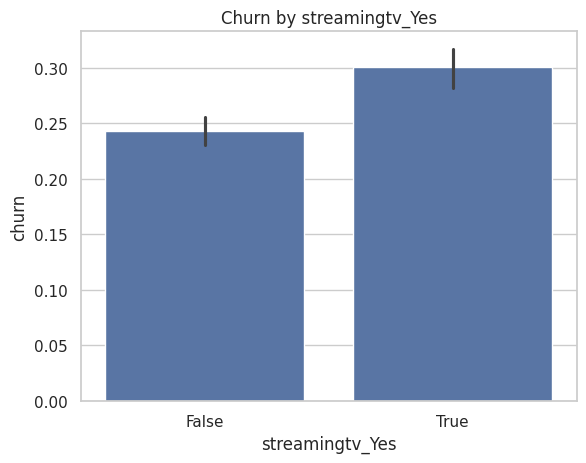

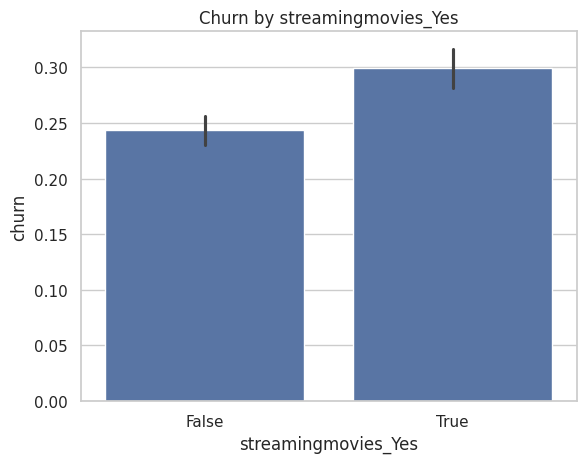

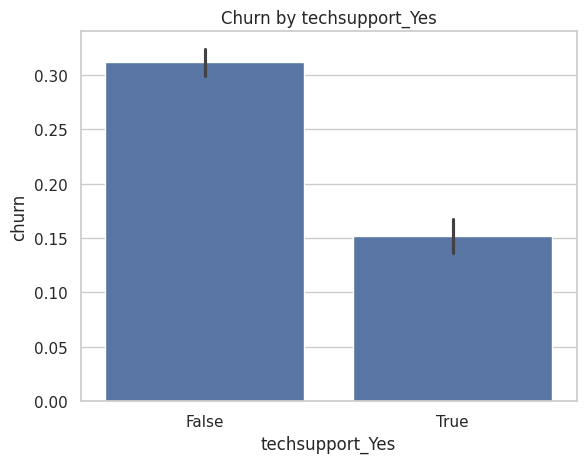

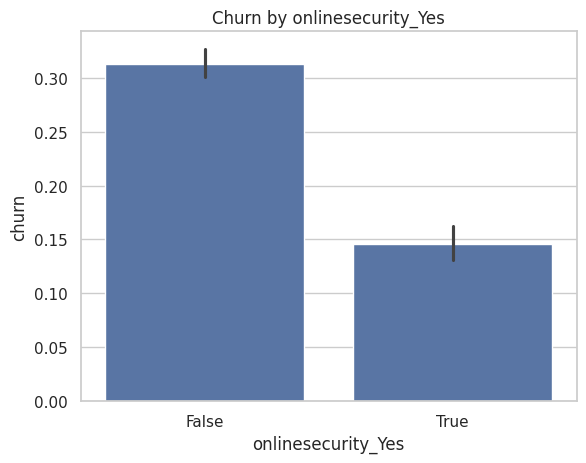

In [15]:
service_cols = [
    'streamingtv_Yes',
    'streamingmovies_Yes',
    'techsupport_Yes',
    'onlinesecurity_Yes'
]

for col in service_cols:
    sns.barplot(x=df[col], y=df['churn'])
    plt.title(f'Churn by {col}')
    plt.show()


1. Customers without technical support andonline security churn more
2. Entertainment-only users churn faster

# Gender Analysis

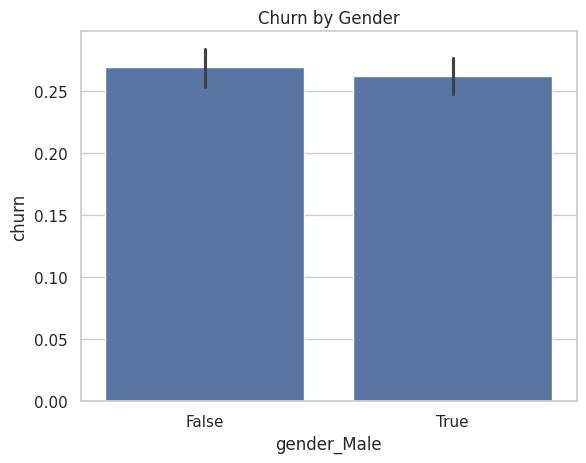

In [16]:
sns.barplot(x=df['gender_Male'], y=df['churn'])
plt.title('Churn by Gender')
plt.show()


1. Gender has minimal impact

# Correlation Analysis

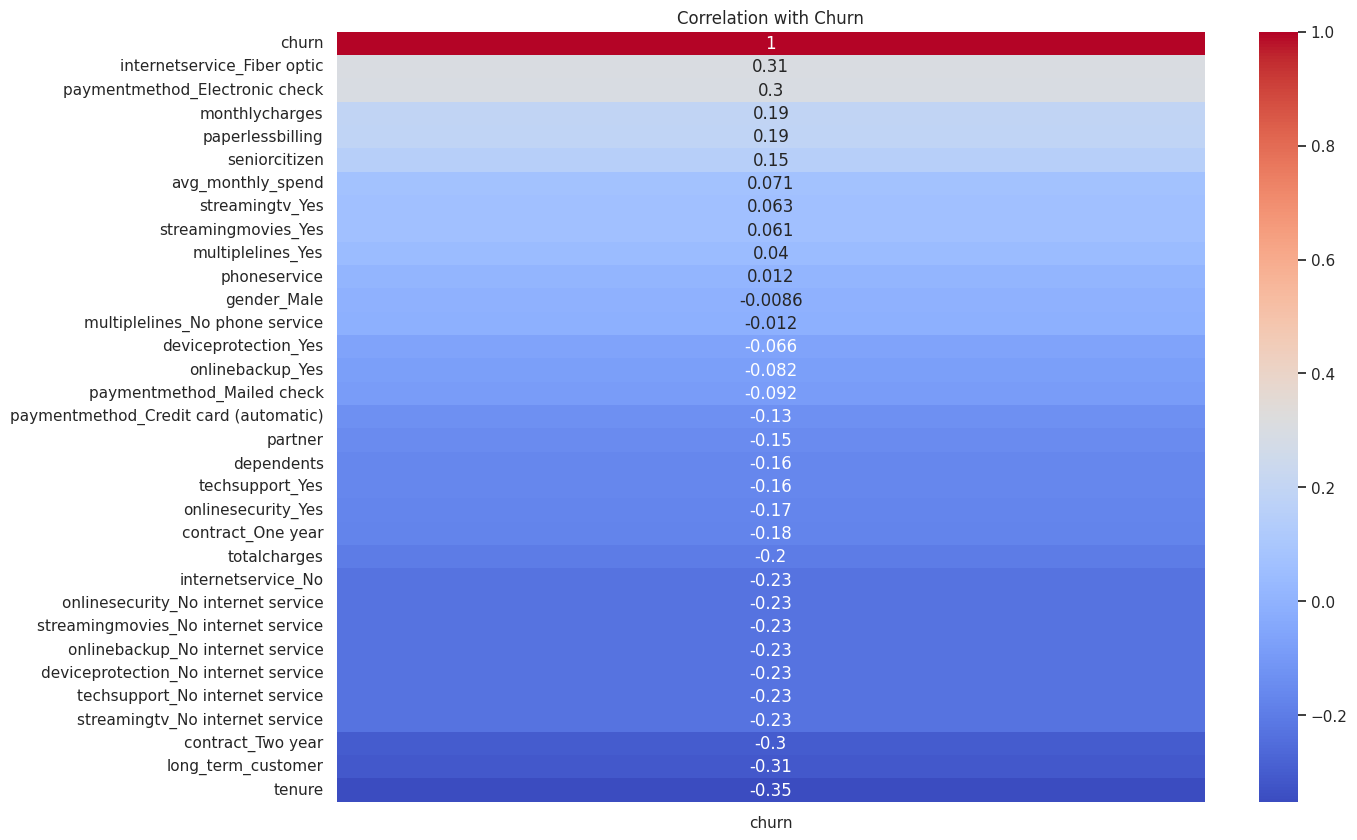

In [17]:
plt.figure(figsize=(14,10))
corr = df.corr()

sns.heatmap(
    corr[['churn']].sort_values(by='churn', ascending=False),
    cmap='coolwarm',
    annot=True
)
plt.title('Correlation with Churn')
plt.show()


Positive (increase churn):
MonthlyCharges, AvgMonthlySpend, ElectronicCheck, SeniorCitizen

Negative (reduce churn):
Tenure, TwoYearContract, OneYearContract, LongTermCustomer,TechSupport

## FINAL BUSINESS INSIGHTS

# High-Risk Customers
1. New users (tenure < 12 months)

2. Month-to-month contracts

3. Electronic check payments

4. High monthly spenders

5. No tech support / security

6. Senior citizens

# RECOMMENDATION
1. Push longer contracts early

2. Promote auto-pay

3. Bundle support + security

4. Early engagement in first 90 days

5. Price justification for premium users